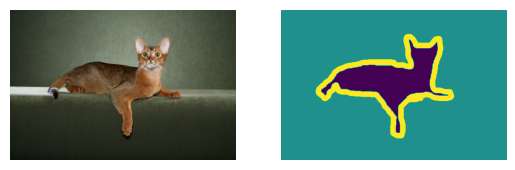

In [39]:
import matplotlib.pyplot as plt
import os


ANNOTATION_DIR = os.path.join("..", "dataset", "pet", "annotations", "trimaps")
TRAIN_DIR = os.path.join("..", "dataset","pet","images")

plt.subplot(1, 2, 1)
plt.axis("off")
plt.imshow(plt.imread(os.path.join(TRAIN_DIR, "Abyssinian_1.jpg")))
plt.subplot(1, 2, 2)
plt.axis("off")
plt.imshow(plt.imread(os.path.join(ANNOTATION_DIR, "Abyssinian_1.png")))


In [48]:
def parse_annotation(annotation_file_path):
    with open(annotation_file_path, "rt") as file:
        lines = [line.replace("\n", "") for line in file.readlines()]
        image_label = {line.split(" ")[0]: line.split(" ")[1] for line in lines}
    return image_label


TRAINVAL_ANNOTATION_TXT = os.path.join(
    "..", "dataset", "pet", "annotations", "trainval.txt"
)
trainval_label = parse_annotation(TRAINVAL_ANNOTATION_TXT)
trainval_label

{'Abyssinian_100': '1',
 'Abyssinian_101': '1',
 'Abyssinian_102': '1',
 'Abyssinian_103': '1',
 'Abyssinian_104': '1',
 'Abyssinian_105': '1',
 'Abyssinian_106': '1',
 'Abyssinian_107': '1',
 'Abyssinian_108': '1',
 'Abyssinian_109': '1',
 'Abyssinian_10': '1',
 'Abyssinian_110': '1',
 'Abyssinian_111': '1',
 'Abyssinian_112': '1',
 'Abyssinian_113': '1',
 'Abyssinian_114': '1',
 'Abyssinian_115': '1',
 'Abyssinian_116': '1',
 'Abyssinian_117': '1',
 'Abyssinian_118': '1',
 'Abyssinian_119': '1',
 'Abyssinian_11': '1',
 'Abyssinian_120': '1',
 'Abyssinian_121': '1',
 'Abyssinian_122': '1',
 'Abyssinian_123': '1',
 'Abyssinian_124': '1',
 'Abyssinian_125': '1',
 'Abyssinian_126': '1',
 'Abyssinian_127': '1',
 'Abyssinian_128': '1',
 'Abyssinian_129': '1',
 'Abyssinian_12': '1',
 'Abyssinian_130': '1',
 'Abyssinian_131': '1',
 'Abyssinian_132': '1',
 'Abyssinian_133': '1',
 'Abyssinian_134': '1',
 'Abyssinian_135': '1',
 'Abyssinian_136': '1',
 'Abyssinian_137': '1',
 'Abyssinian_138': 

In [4]:
from tensorflow.python.keras import layers
from tensorflow.python import keras
from tensorflow.keras.layers.experimental import preprocessing


def get_model(img_size: tuple, num_classes: int):
    input_tensor = keras.Input((*img_size, 3))
    
    x = preprocessing.Rescaling(1.0 / 255)(input_tensor)
    x = layers.Conv2D(64, 3, strides=2, activation="relu", padding="same")(x)
    x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
    x = layers.Conv2D(128, 3, strides=2, activation="relu", padding="same")(x)
    x = layers.Conv2D(128, 3, activation="relu", padding="same")(x)
    x = layers.Conv2D(256, 3, strides=2, activation="relu", padding="same")(x)
    x = layers.Conv2D(256, 3, activation="relu", padding="same")(x)

    x = layers.Conv2DTranspose(256, 3, activation="relu", padding="same")(x)
    x = layers.Conv2DTranspose(256, 3, strides=2, activation="relu", padding="same")(x)
    x = layers.Conv2DTranspose(128, 3, activation="relu", padding="same")(x)
    x = layers.Conv2DTranspose(128, 3, strides=2, activation="relu", padding="same")(x)
    x = layers.Conv2DTranspose(64, 3, activation="relu", padding="same")(x)
    x = layers.Conv2DTranspose(64, 3, strides=2, activation="relu", padding="same")(x)

    output_tensor = layers.Conv2D(
        num_classes, 3, activation="softmax", padding="same"
    )(x)
    return keras.Model(inputs=[input_tensor], outputs=[output_tensor])

model = get_model((256, 256), 3)
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
tf.cast_2 (TFOpLambda)       (None, 256, 256, 3)       0         
_________________________________________________________________
tf.math.multiply_2 (TFOpLamb (None, 256, 256, 3)       0         
_________________________________________________________________
tf.__operators__.add_2 (TFOp (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 128, 128, 64)      1792      
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 128, 128, 64)      36928     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 64, 64, 128)       7385